In [2]:
# 01_exploration_and_cleaning.ipynb

from pathlib import Path
import sys

import pandas as pd
import matplotlib.pyplot as plt

# Make plots show inline in the notebook
%matplotlib inline

# --- Make sure we can import from src/ ---

# Current working directory should be .../cs439-final-project/notebooks
NOTEBOOK_DIR = Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR.parent   # .../cs439-final-project

# Add project root to Python path so `src` is importable
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.cleaning import load_and_clean_epa, load_and_clean_sports
from src.aggregates import compute_epa_yearly, compute_sports_yearly

PROJECT_ROOT, NOTEBOOK_DIR

(PosixPath('/Users/aryanwad/CS439-Final-Project'),
 PosixPath('/Users/aryanwad/CS439-Final-Project/notebooks'))

In [3]:
# Paths to raw data (relative to project root)
epa_raw_path = PROJECT_ROOT / "data" / "raw" / "all-vehicles-model.csv"
sports_raw_path = PROJECT_ROOT / "data" / "raw" / "Sport car price.csv"

print("EPA raw path:    ", epa_raw_path)
print("Sports raw path: ", sports_raw_path)

# Load + clean using our src/cleaning.py helpers
epa_clean = load_and_clean_epa(epa_raw_path, year_min=2000, year_max=2025)
sports_clean = load_and_clean_sports(sports_raw_path, year_min=2000, year_max=2025)

epa_clean.shape, sports_clean.shape


EPA raw path:     /Users/aryanwad/CS439-Final-Project/data/raw/all-vehicles-model.csv
Sports raw path:  /Users/aryanwad/CS439-Final-Project/data/raw/Sport car price.csv


((9712, 8), (1006, 8))

In [4]:
# Peek at EPA data
display(epa_clean.head())
display(epa_clean.describe(include="all").T.head())

print("\nEPA years:", sorted(epa_clean["Year"].unique())[:5], "...", sorted(epa_clean["Year"].unique())[-5:])

# Peek at sports car data
display(sports_clean.head())
display(sports_clean.describe(include="all").T.head())

print("\nSports years:", sorted(sports_clean["Year"].unique()))


,Make,Model,Year,Fuel Type,MPG Data,Combined Mpg For Fuel Type1,Co2 Tailpipe For Fuel Type1,Engine displacement
2,Honda,Accord,2012,Regular,Y,27,329.148148,2.4
3,Jeep,Compass 4WD,2012,Regular,Y,23,386.391304,2.4
5,Nissan,Pathfinder 2WD,2013,Regular,Y,22,406.000000,3.5
7,BMW,535d,2015,Diesel,Y,30,334.000000,3.0
11,Chevrolet,Cruze,2018,Diesel,Y,37,276.000000,1.6


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,9712,56,Ford,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,9712,1748,Jetta,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,9712.0,NaN,NaN,NaN,2008.702533,5.997731,2000.0,2004.0,2008.0,2013.0,2024.0
Fuel Type,9712,13,Regular,6371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MPG Data,9712,1,Y,9712,NaN,NaN,NaN,NaN,NaN,NaN,NaN



EPA years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004)] ... [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331.0,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443.0,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561.0,3.0,333750
3,Audi,R8,2022,5.2,562,406.0,3.2,142700
4,McLaren,720S,2021,4.0,710,568.0,2.7,298000


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car Make,1006,37,Porsche,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car Model,1006,175,GT,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1006.0,NaN,NaN,NaN,2021.257455,0.968313,2014.0,2021.0,2021.0,2022.0,2023.0
Engine Size (L),953.0,NaN,NaN,NaN,4.579958,4.446123,0.0,3.5,4.0,5.2,100.0
Horsepower,1006.0,NaN,NaN,NaN,658.205765,593.271066,181.0,454.25,591.0,709.25,10000.0



Sports years: [np.int64(2014), np.int64(2015), np.int64(2017), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


In [5]:
epa_yearly = compute_epa_yearly(epa_clean)
sports_yearly = compute_sports_yearly(sports_clean)

display(epa_yearly.head())
display(epa_yearly.tail())

display(sports_yearly.head())
display(sports_yearly.tail())


,Year,Combined Mpg For Fuel Type1,Co2 Tailpipe For Fuel Type1,Engine displacement
0,2000,19.845238,469.282663,3.121032
1,2001,20.021858,466.110540,3.069945
2,2002,19.800693,472.085406,3.147660
3,2003,20.082474,466.427563,3.149141
4,2004,19.912773,469.712908,3.242523


,Year,Combined Mpg For Fuel Type1,Co2 Tailpipe For Fuel Type1,Engine displacement
20,2020,31.683099,324.676056,2.671324
21,2021,34.784173,306.690647,2.693750
22,2022,39.090164,272.106557,2.464151
23,2023,42.611111,256.344444,2.306410
24,2024,38.485714,264.542857,2.156250


,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,2014,6.200000,622.000000,468.000000,3.500000,275000.000000
1,2015,5.858333,650.750000,529.500000,3.383333,617985.000000
2,2017,8.400000,645.000000,600.000000,3.300000,121661.666667
3,2019,4.233333,615.333333,533.666667,3.600000,444326.666667
4,2020,3.648000,453.080000,381.040000,3.916000,317062.480000


,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
3,2019,4.233333,615.333333,533.666667,3.600000,444326.666667
4,2020,3.648000,453.080000,381.040000,3.916000,317062.480000
5,2021,4.792252,634.543403,545.818815,3.469583,381301.715278
6,2022,4.229915,708.041885,593.565789,3.561832,382631.041885
7,2023,4.250000,675.000000,579.000000,2.833333,108333.333333


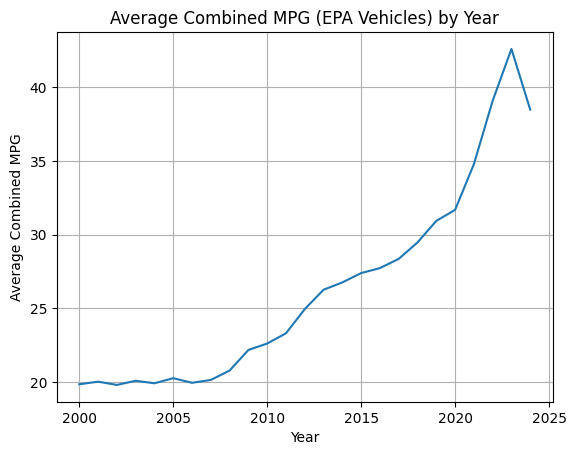

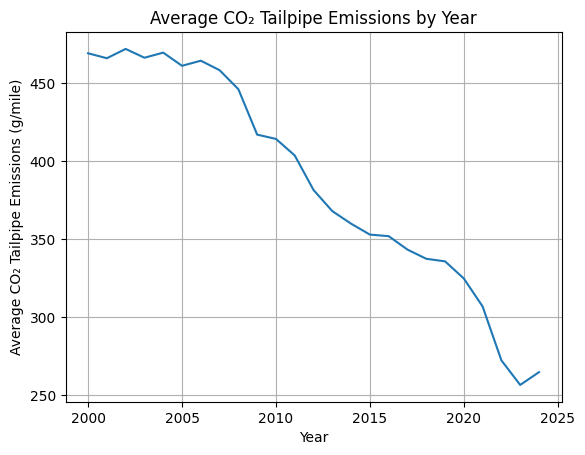

In [6]:
# --- EPA: fuel economy & CO2 over time ---

plt.figure()
plt.plot(epa_yearly["Year"], epa_yearly["Combined Mpg For Fuel Type1"])
plt.xlabel("Year")
plt.ylabel("Average Combined MPG")
plt.title("Average Combined MPG (EPA Vehicles) by Year")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(epa_yearly["Year"], epa_yearly["Co2  Tailpipe For Fuel Type1"])
plt.xlabel("Year")
plt.ylabel("Average CO₂ Tailpipe Emissions (g/mile)")
plt.title("Average CO₂ Tailpipe Emissions by Year")
plt.grid(True)
plt.show()


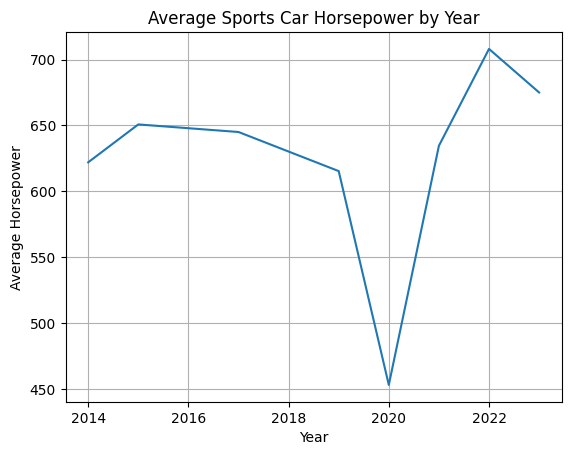

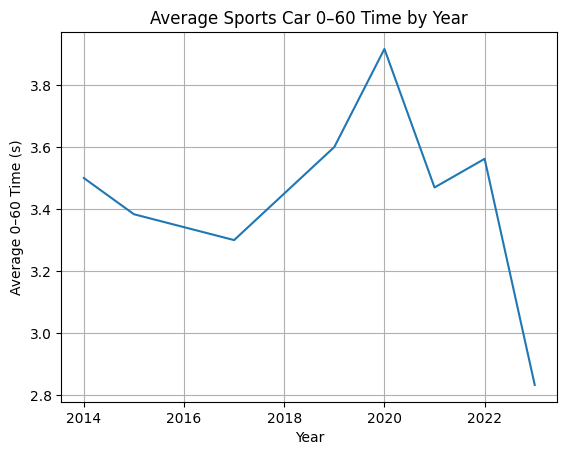

In [7]:
# --- Sports cars: horsepower & 0–60 over time ---

plt.figure()
plt.plot(sports_yearly["Year"], sports_yearly["Horsepower"])
plt.xlabel("Year")
plt.ylabel("Average Horsepower")
plt.title("Average Sports Car Horsepower by Year")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(sports_yearly["Year"], sports_yearly["0-60 MPH Time (seconds)"])
plt.xlabel("Year")
plt.ylabel("Average 0–60 Time (s)")
plt.title("Average Sports Car 0–60 Time by Year")
plt.grid(True)
plt.show()
